In [66]:
#load data from web
import pandas as pd
import numpy as np

url="https://api.blockchain.info/charts/n-unique-addresses?timespan=all&format=csv"
n_users=pd.read_csv(url,names=['day','n_users'],parse_dates=['day'])

url="https://api.blockchain.info/charts/market-price?timespan=all&format=csv"
price=pd.read_csv(url,names=['day','price'],parse_dates=['day'])

In [67]:
price.head()

,day,price
0,2009-01-03,0.0
1,2009-01-05,0.0
2,2009-01-07,0.0
3,2009-01-09,0.0
4,2009-01-11,0.0


In [68]:
price.groupby(lambda x: price['day'][x].year).mean()

,price
2009,0.000000
2010,0.062411
2011,6.053922
2012,8.471968
2013,188.786394
2014,525.329672
2015,271.827637
2016,566.382990
2017,4018.138670
2018,11374.319994


In [69]:
price.groupby(lambda x: price['day'][x].year).std()

,price
2009,0.000000
2010,0.099882
2011,6.242899
2012,3.268285
2013,242.251209
2014,144.654345
2015,58.343967
2016,137.446800
2017,4077.660877
2018,2639.796745


In [70]:
price['SMA20'] = price.price.rolling(window=20).mean()
price['SMA50'] = price.price.rolling(window=50).mean()

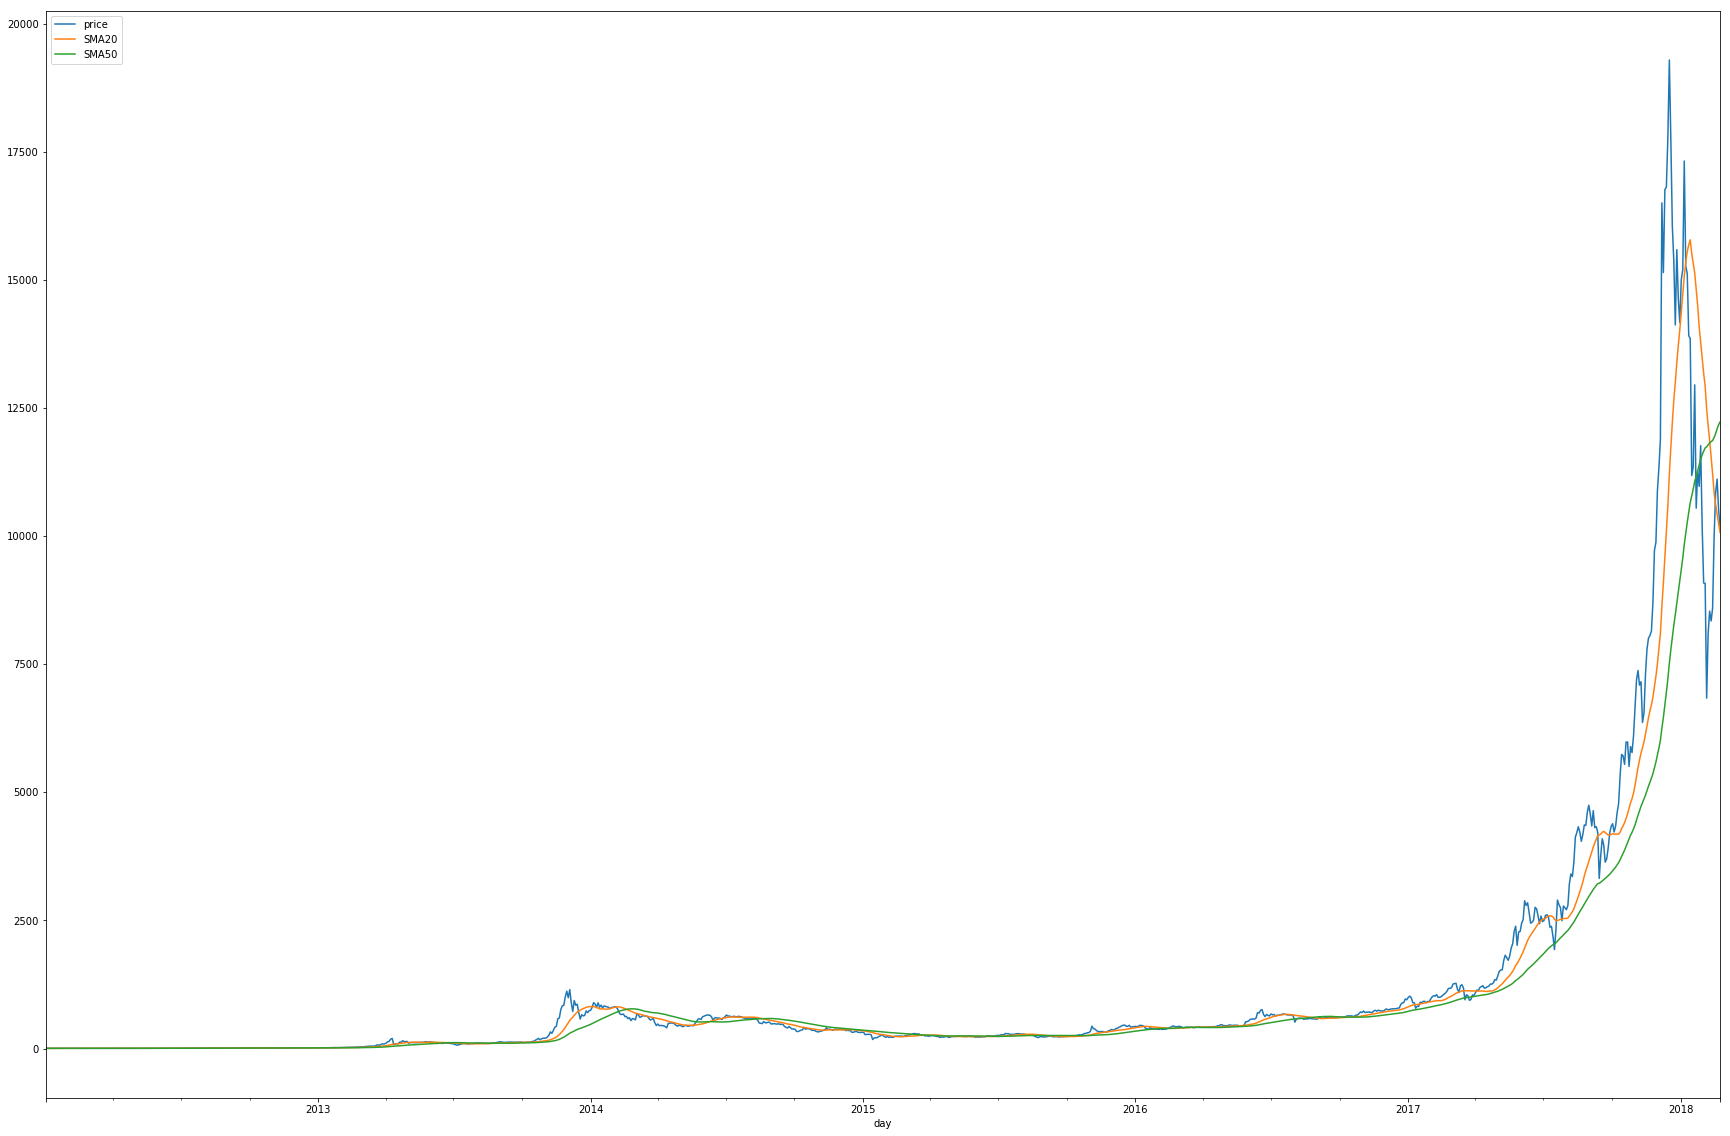

In [71]:
%matplotlib inline
sma = price[price.day.between('1/1/2012','1/1/2019')].plot.line(x='day', y=['price','SMA20','SMA50'],figsize=(30,20))
fig = sma.get_figure()
fig.savefig("sma.pdf")

In [72]:
log_transform = lambda x: 0 if x == 0 else np.log(x)
price['logprice']=price['price'].apply(log_transform)
price['logSMA20']=price['SMA20'].apply(log_transform)
price['logSMA50']=price['SMA50'].apply(log_transform)

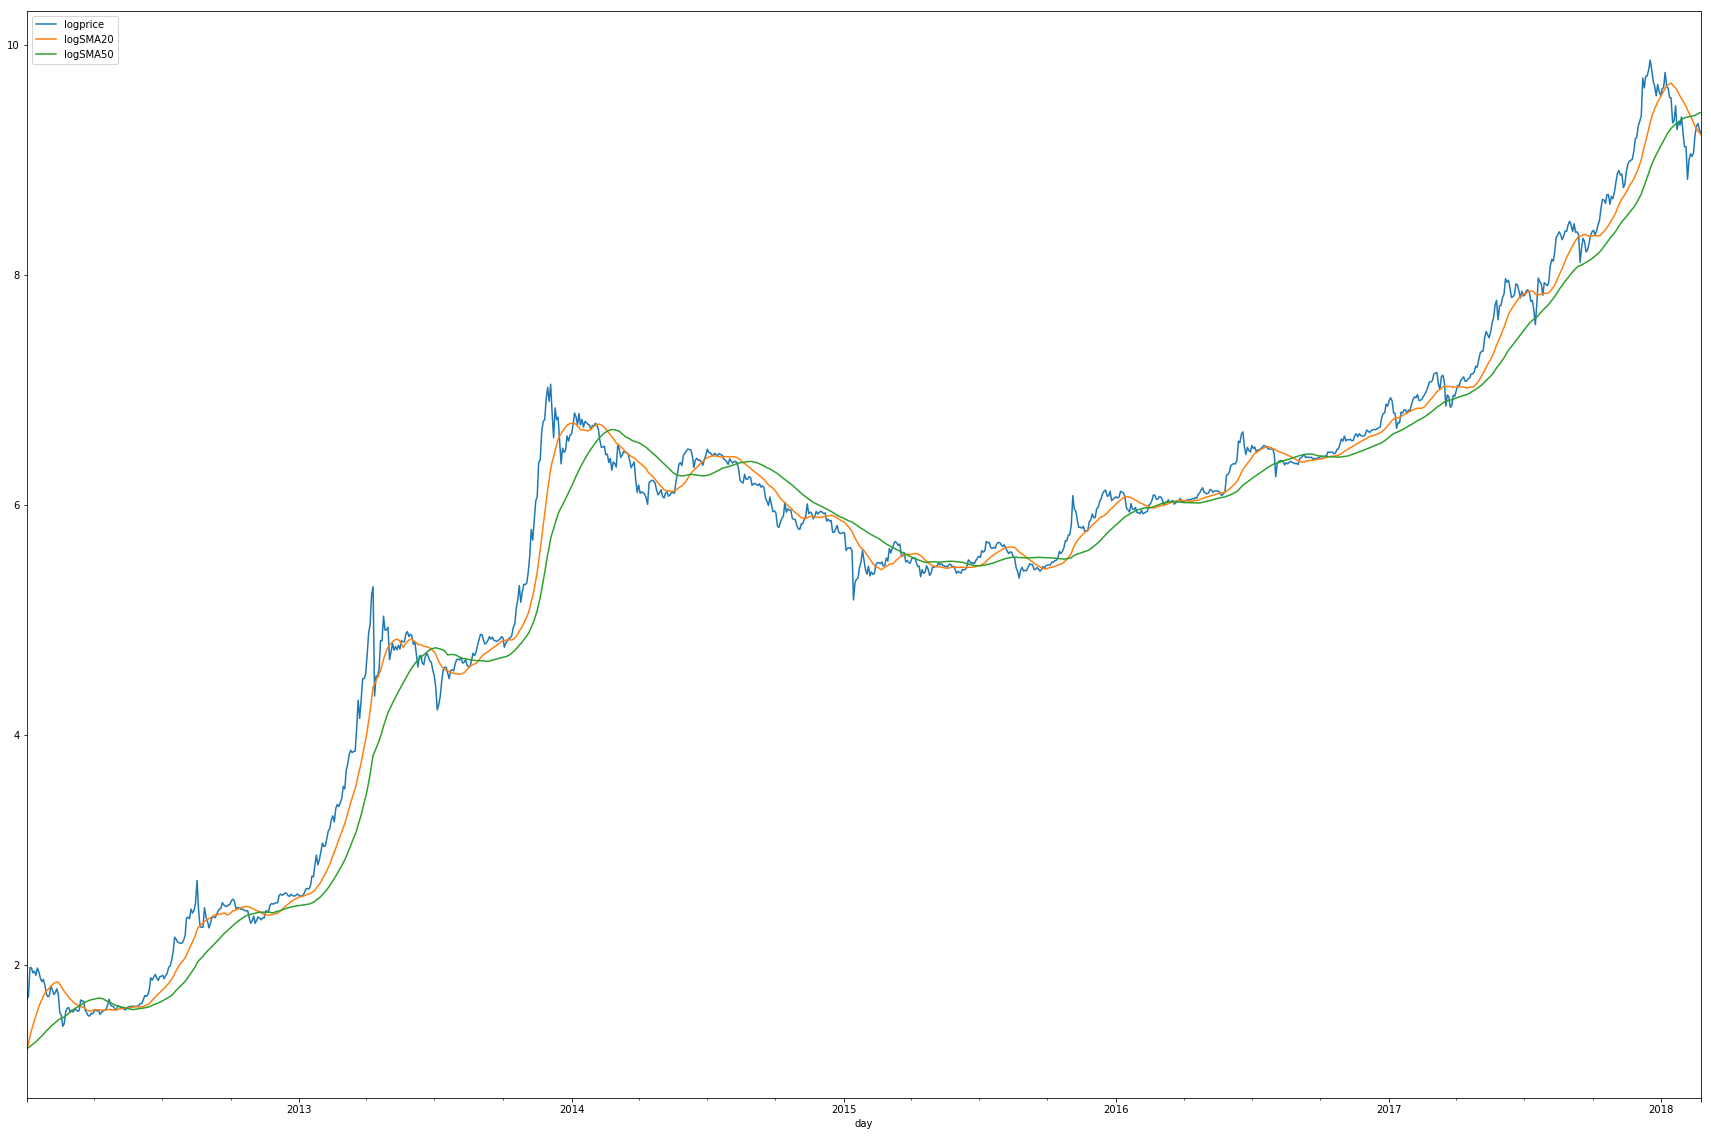

In [73]:
logsma = price[price.day.between('1/1/2012','1/1/2019')].plot.line(x='day', y=['logprice','logSMA20','logSMA50'],figsize=(30,20))
fig = logsma.get_figure()
fig.savefig("logsma.pdf")

In [64]:
n_users.head()

,day,n_users
0,2009-01-03,1.0
1,2009-01-05,0.0
2,2009-01-07,0.0
3,2009-01-09,14.0
4,2009-01-11,106.0


In [83]:
metcalf_k = 4*(10**-9)
metcalf = lambda x: 1**-9 if x == 0 else (x ** 2) * metcalf_k

In [84]:
n_users['metcalf'] = n_users['n_users'].apply(metcalf)
n_users.metcalf.head()

0    4.000000e-09
1    1.000000e+00
2    1.000000e+00
3    7.840000e-07
4    4.494400e-05
Name: metcalf, dtype: float64

In [88]:
price['metcalf'] = n_users['metcalf']
price['price_metcalf_ratio'] = price.price / price.metcalf
price['price_metcalf_SMA7']  = price.price_metcalf_ratio.rolling(window=7).mean()
price['price_metcalf_SMA20'] = price.price_metcalf_ratio.rolling(window=20).mean()
price['price_metcalf_SMA50'] = price.price_metcalf_ratio.rolling(window=50).mean()

In [92]:
price.head()

,day,price,SMA20,SMA50,logprice,logSMA20,logSMA50,metcalf,price_metcalf_ratio,price_metcalf_SMA7,price_metcalf_SMA20,price_metcalf_SMA50
0,2009-01-03,0.0,NaN,NaN,0.0,NaN,NaN,4.000000e-09,0.0,NaN,NaN,NaN
1,2009-01-05,0.0,NaN,NaN,0.0,NaN,NaN,1.000000e+00,0.0,NaN,NaN,NaN
2,2009-01-07,0.0,NaN,NaN,0.0,NaN,NaN,1.000000e+00,0.0,NaN,NaN,NaN
3,2009-01-09,0.0,NaN,NaN,0.0,NaN,NaN,7.840000e-07,0.0,NaN,NaN,NaN
4,2009-01-11,0.0,NaN,NaN,0.0,NaN,NaN,4.494400e-05,0.0,NaN,NaN,NaN


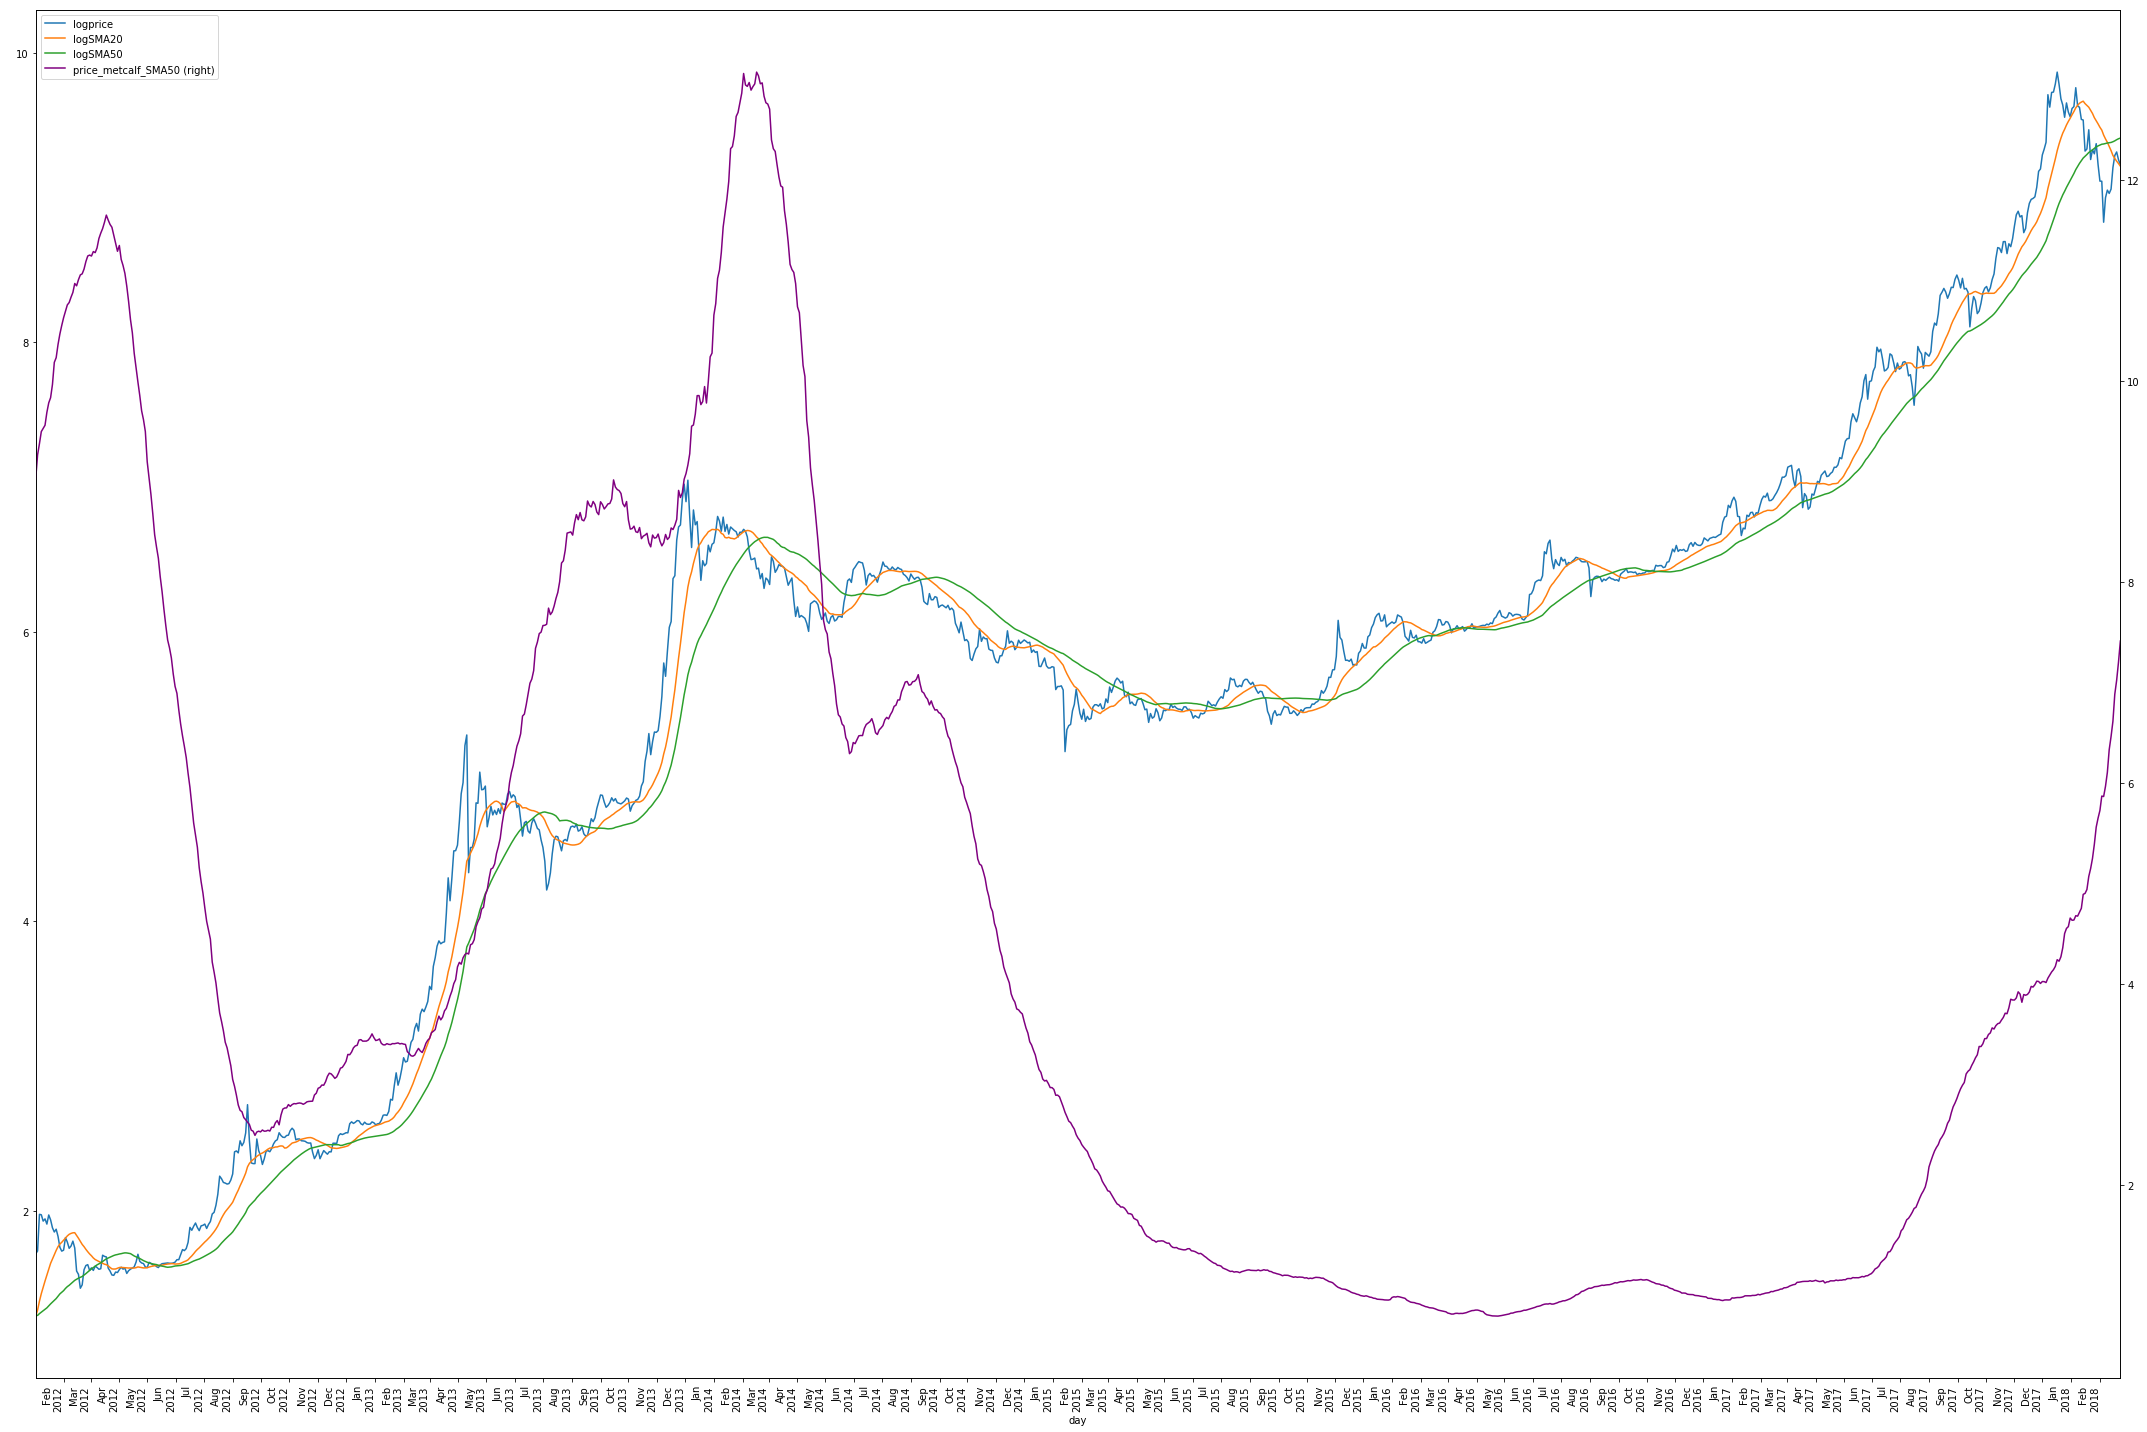

In [115]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n\n%b\n%Y'))

sma_metcalf = price[price.day.between('1/1/2012','1/1/2019')].plot.line(x_compat=True,ax=ax,x='day', y=['logprice','logSMA20','logSMA50'],figsize=(30,20),rot=90)
sma_metcalf = price[price.day.between('1/1/2012','1/1/2019')].plot.line(x_compat=True,ax=ax,x='day', y=['price_metcalf_SMA50'],figsize=(30,20),secondary_y=True,alpha=1,color='purple',rot=90)
plt.tight_layout()
fig = sma_metcalf.get_figure()
fig.savefig("sma_metcalf.pdf")